In [96]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("data_set.csv")
df.head()

,YEAR,MO,DY,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,PS,WS10M
0,1981,2,1,14.98,11.94,8.79,82.56,5.52,100.03,3.10
1,1981,2,2,15.78,11.65,8.61,78.06,0.04,100.02,2.02
2,1981,2,3,15.36,11.64,8.54,80.38,0.75,100.07,2.30
3,1981,2,4,15.77,11.55,8.54,77.62,0.00,99.94,2.19
4,1981,2,5,16.55,11.87,8.73,76.00,0.00,100.03,2.04


In [22]:
df.shape

(15368, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15368 entries, 0 to 15367
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         15368 non-null  int64  
 1   MO           15368 non-null  int64  
 2   DY           15368 non-null  int64  
 3   T2M          15368 non-null  float64
 4   T2MDEW       15368 non-null  float64
 5   QV2M         15368 non-null  float64
 6   RH2M         15368 non-null  float64
 7   PRECTOTCORR  15368 non-null  float64
 8   PS           15368 non-null  float64
 9   WS10M        15368 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.2 MB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,15368.0,2001.624219,12.147450,1981.0,1991.0000,2002.00,2012.00,2023.00
MO,15368.0,6.514836,3.451027,1.0,4.0000,7.00,10.00,12.00
DY,15368.0,15.726965,8.799090,1.0,8.0000,16.00,23.00,31.00
T2M,15368.0,23.769878,15.143121,-999.0,19.4975,25.56,28.24,33.86
T2MDEW,15368.0,18.227975,15.535352,-999.0,12.8300,19.44,24.55,27.53
QV2M,15368.0,14.170456,15.094699,-999.0,9.3400,14.34,19.71,23.68
RH2M,15368.0,73.559393,19.248063,-999.0,66.9850,77.00,82.69,94.81
PRECTOTCORR,15368.0,4.656510,17.329175,-999.0,0.0000,0.40,5.04,183.78
PS,15368.0,99.026087,15.353508,-999.0,98.7700,99.25,99.71,100.69
WS10M,15368.0,2.442391,14.013726,-999.0,2.1200,2.57,3.05,9.38


In [25]:
df.isnull().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
dtype: int64

In [48]:
df.apply(pd.isnull).sum()/df.shape[0]

YEAR           0.0
MO             0.0
DY             0.0
T2M            0.0
T2MDEW         0.0
QV2M           0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS10M          0.0
dtype: float64

In [27]:
weather = df[["YEAR", "MO", "DY", "T2M", "T2MDEW", "QV2M", "RH2M", "PRECTOTCORR", "PS", "WS10M"]].copy()

In [28]:
weather.columns = ["Year", "Month", "Day", "Temp@2M", "Dew@2M", "SpHum@2M", "RelHum@2M", "PptCorr", "SurfPressure", "WindSpd@10M"]

In [49]:
weather['Date'] = df["YEAR"].astype(str) + "-" + df["MO"].astype(str) + "-" + df["DY"].astype(str)

In [57]:
weather

,Year,Month,Day,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M,Date
0,1981,2,1,14.98,11.94,8.79,82.56,5.52,100.03,3.10,1981-2-1
1,1981,2,2,15.78,11.65,8.61,78.06,0.04,100.02,2.02,1981-2-2
2,1981,2,3,15.36,11.64,8.54,80.38,0.75,100.07,2.30,1981-2-3
3,1981,2,4,15.77,11.55,8.54,77.62,0.00,99.94,2.19,1981-2-4
4,1981,2,5,16.55,11.87,8.73,76.00,0.00,100.03,2.04,1981-2-5
...,...,...,...,...,...,...,...,...,...,...,...
15363,2023,2,24,21.04,11.44,8.48,56.12,0.00,99.79,2.77,2023-2-24
15364,2023,2,25,21.41,12.61,9.09,60.12,0.00,100.12,3.23,2023-2-25
15365,2023,2,26,22.23,12.56,9.09,57.19,0.00,100.15,3.05,2023-2-26
15366,2023,2,27,22.27,11.05,8.24,51.31,0.00,100.03,2.59,2023-2-27


In [64]:
weather.dtypes

Year              int64
Month             int64
Day               int64
Temp@2M         float64
Dew@2M          float64
SpHum@2M        float64
RelHum@2M       float64
PptCorr         float64
SurfPressure    float64
WindSpd@10M     float64
Date             object
dtype: object

In [78]:
weather.index = weather["Date"]

In [79]:
weather.index

Index(['1981-2-1', '1981-2-2', '1981-2-3', '1981-2-4', '1981-2-5', '1981-2-6',
       '1981-2-7', '1981-2-8', '1981-2-9', '1981-2-10',
       ...
       '2023-2-19', '2023-2-20', '2023-2-21', '2023-2-22', '2023-2-23',
       '2023-2-24', '2023-2-25', '2023-2-26', '2023-2-27', '2023-2-28'],
      dtype='object', name='Date', length=15368)

In [80]:
weather.index = pd.to_datetime(weather.index) #why??

In [82]:
#weather = weather.reset_index(drop=True) #why??

In [81]:
weather.index 

DatetimeIndex(['1981-02-01', '1981-02-02', '1981-02-03', '1981-02-04',
               '1981-02-05', '1981-02-06', '1981-02-07', '1981-02-08',
               '1981-02-09', '1981-02-10',
               ...
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
               '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', name='Date', length=15368, freq=None)

<Axes: xlabel='Date'>

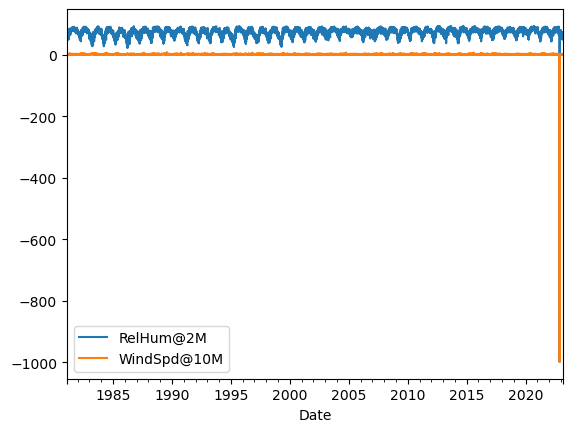

In [91]:
weather[["RelHum@2M", "WindSpd@10M"]].plot()

<Axes: xlabel='Date'>

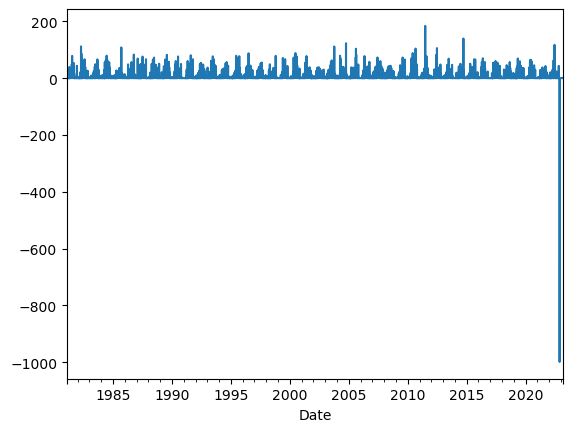

In [92]:
weather["PptCorr"].plot()

In [85]:
del weather["Year"]
del weather["Month"]
del weather["Day"]

In [88]:
weather

,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M,Date
Date,,,,,,,,
1981-02-01,14.98,11.94,8.79,82.56,5.52,100.03,3.10,1981-2-1
1981-02-02,15.78,11.65,8.61,78.06,0.04,100.02,2.02,1981-2-2
1981-02-03,15.36,11.64,8.54,80.38,0.75,100.07,2.30,1981-2-3
1981-02-04,15.77,11.55,8.54,77.62,0.00,99.94,2.19,1981-2-4
1981-02-05,16.55,11.87,8.73,76.00,0.00,100.03,2.04,1981-2-5
...,...,...,...,...,...,...,...,...
2023-02-24,21.04,11.44,8.48,56.12,0.00,99.79,2.77,2023-2-24
2023-02-25,21.41,12.61,9.09,60.12,0.00,100.12,3.23,2023-2-25
2023-02-26,22.23,12.56,9.09,57.19,0.00,100.15,3.05,2023-2-26


In [89]:
del weather["Date"]

In [90]:
weather

,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M
Date,,,,,,,
1981-02-01,14.98,11.94,8.79,82.56,5.52,100.03,3.10
1981-02-02,15.78,11.65,8.61,78.06,0.04,100.02,2.02
1981-02-03,15.36,11.64,8.54,80.38,0.75,100.07,2.30
1981-02-04,15.77,11.55,8.54,77.62,0.00,99.94,2.19
1981-02-05,16.55,11.87,8.73,76.00,0.00,100.03,2.04
...,...,...,...,...,...,...,...
2023-02-24,21.04,11.44,8.48,56.12,0.00,99.79,2.77
2023-02-25,21.41,12.61,9.09,60.12,0.00,100.12,3.23
2023-02-26,22.23,12.56,9.09,57.19,0.00,100.15,3.05


In [93]:
weather["target"] = weather.shift(-1)["PptCorr"]
weather

,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M,target
Date,,,,,,,,
1981-02-01,14.98,11.94,8.79,82.56,5.52,100.03,3.10,0.04
1981-02-02,15.78,11.65,8.61,78.06,0.04,100.02,2.02,0.75
1981-02-03,15.36,11.64,8.54,80.38,0.75,100.07,2.30,0.00
1981-02-04,15.77,11.55,8.54,77.62,0.00,99.94,2.19,0.00
1981-02-05,16.55,11.87,8.73,76.00,0.00,100.03,2.04,0.00
...,...,...,...,...,...,...,...,...
2023-02-24,21.04,11.44,8.48,56.12,0.00,99.79,2.77,0.00
2023-02-25,21.41,12.61,9.09,60.12,0.00,100.12,3.23,0.00
2023-02-26,22.23,12.56,9.09,57.19,0.00,100.15,3.05,0.00


In [94]:
weather = weather.ffill()
weather

,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M,target
Date,,,,,,,,
1981-02-01,14.98,11.94,8.79,82.56,5.52,100.03,3.10,0.04
1981-02-02,15.78,11.65,8.61,78.06,0.04,100.02,2.02,0.75
1981-02-03,15.36,11.64,8.54,80.38,0.75,100.07,2.30,0.00
1981-02-04,15.77,11.55,8.54,77.62,0.00,99.94,2.19,0.00
1981-02-05,16.55,11.87,8.73,76.00,0.00,100.03,2.04,0.00
...,...,...,...,...,...,...,...,...
2023-02-24,21.04,11.44,8.48,56.12,0.00,99.79,2.77,0.00
2023-02-25,21.41,12.61,9.09,60.12,0.00,100.12,3.23,0.00
2023-02-26,22.23,12.56,9.09,57.19,0.00,100.15,3.05,0.00


In [95]:
weather.corr()

,Temp@2M,Dew@2M,SpHum@2M,RelHum@2M,PptCorr,SurfPressure,WindSpd@10M,target
Temp@2M,1.000000,0.978435,0.983915,0.777534,0.823876,0.932804,0.942642,0.576483
Dew@2M,0.978435,1.000000,0.996745,0.882145,0.831968,0.902912,0.912010,0.584096
SpHum@2M,0.983915,0.996745,1.000000,0.872915,0.840519,0.927012,0.935217,0.587013
RelHum@2M,0.777534,0.882145,0.872915,1.000000,0.742082,0.772349,0.772567,0.507931
PptCorr,0.823876,0.831968,0.840519,0.742082,1.000000,0.800752,0.810979,0.601703
SurfPressure,0.932804,0.902912,0.927012,0.772349,0.800752,1.000000,0.997781,0.532194
WindSpd@10M,0.942642,0.912010,0.935217,0.772567,0.810979,0.997781,1.000000,0.542544
target,0.576483,0.584096,0.587013,0.507931,0.601703,0.532194,0.542544,1.000000


In [97]:
rr= Ridge(alpha=.1)

In [98]:
predictors = weather.columns[~weather.columns.isin(["target"])]

In [99]:
predictors

Index(['Temp@2M', 'Dew@2M', 'SpHum@2M', 'RelHum@2M', 'PptCorr', 'SurfPressure',
       'WindSpd@10M'],
      dtype='object')

In [100]:
def backtest(weather, model, predictors, start = 3650, step = 90):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
         train = weather.iloc[:i, :]
         test = weather.iloc[i:(i+step), :]
         
         model.fit(train[predictors], train["target"])
         preds = model.predict(test[predictors])
         preds = pd.Series(preds, index=test.index)
         
         combined = pd.concat([test["target"], preds], axis = 1)
         combined.columns = ["actual", "predictions"]
         combined["diff"] = (combined["predictions"] - combined["actual"]).abs()
         
         all_predictions.append(combined)

    return pd.concat(all_predictions)

In [101]:
predictions = backtest(weather, rr, predictors)

In [102]:
predictions

,actual,predictions,diff
Date,,,
1991-01-30,0.00,-0.062118,0.062118
1991-01-31,0.00,-0.231940,0.231940
1991-02-01,0.05,0.471975,0.421975
1991-02-02,0.52,0.743512,0.223512
1991-02-03,0.06,0.237065,0.177065
...,...,...,...
2023-02-24,0.00,0.386668,0.386668
2023-02-25,0.00,0.444170,0.444170
2023-02-26,0.00,0.317950,0.317950


In [103]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["predictions"])

5.098373244987037